# ** 05.Hierarchical Clustering Code 실습**

[목적]
  - 비지도학습 중 하나인 Clustering 중 Hierarchical Clustering 실습
  - 덴드로그램을 그려 Cluster 결정
  - Clustering은 기본적으로 Data가 많을 때 시간이 굉장히 오래걸림
     - Distance Matrix를 만들고 행렬 계산을 하는 알고리즘이 많기 때문

[Process]
  1. Define X's
  2. Modeling

1. 원리:
계층적 클러스터링은 시작할 때 각 데이터 포인트를 하나의 클러스터로 간주합니다. 그 다음 가장 가까운 두 클러스터를 찾아 병합하는 과정을 반복적으로 수행하면서 하나의 클러스터가 될 때까지 병합을 계속합니다. 이러한 방식 때문에 "병합적" 또는 "상향식" 방법이라고도 합니다.

2. 덴드로그램 (Dendrogram):
덴드로그램은 계층적 클러스터링의 결과를 시각화하기 위한 트리 형태의 다이어그램입니다. 이 트리의 각 분기는 두 클러스터의 병합을 나타냅니다. 덴드로그램의 y축은 병합에 사용된 거리나 유사도를 나타내며, x축은 데이터 포인트나 클러스터를 나타냅니다.

3. 거리 측정:
계층적 클러스터링은 클러스터간의 거리나 유사도를 기반으로 합니다. 이 거리나 유사도를 계산하기 위한 방법에는 여러가지가 있습니다. (예: 단일 연결, 완전 연결, 평균 연결, 중심 연결, 와드 방법 등)

4. 클러스터 수의 결정:
덴드로그램을 사용하면 적절한 클러스터 수를 선택할 수 있습니다. 덴드로그램에서 특정 거리를 기준으로 수평선을 그어 그 선과 교차하는 분기의 수를 세면 원하는 클러스터 수를 결정할 수 있습니다.

5. 계산 복잡도:
계층적 클러스터링은 거리 행렬을 사용하므로, 데이터의 양이 많을 경우 계산 복잡도가 높아집니다. 그 결과, 큰 데이터셋에 대한 클러스터링은 시간이 많이 소요됩니다.

6. 장점과 단점:
- 장점: 덴드로그램을 통해 데이터의 계층적 구조를 시각적으로 이해하기 쉽습니다. 클러스터 수를 미리 지정할 필요가 없습니다.

- 단점: 큰 데이터셋에는 비효율적이며, 한 번 병합된 클러스터는 나중에 다시 분리되지 않습니다.

요약하면, 계층적 클러스터링은 데이터의 계층적 구조를 시각적으로 표현할 수 있는 덴드로그램을 생성하며, 특히 데이터셋이 작을 때 유용하게 사용됩니다.

In [1]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler

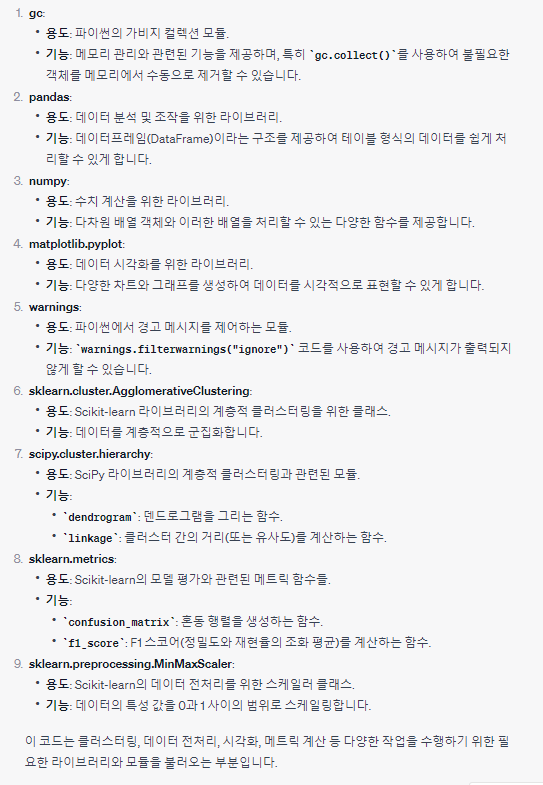

In [2]:
# Data Loading (수술 時 사망 데이터)
data=pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv")